<a href="https://colab.research.google.com/github/BasavarajG26/Melanoma-Detection-Assignment/blob/main/G_Basavaraj_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from google.colab import drive

### Mounting the google drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


### Checking present working directory and  change the working directory

In [4]:
%pwd

'/content'

In [6]:
os.chdir("/content/drive/My Drive/Melanoma Detection")

In [7]:
%pwd

'/content/drive/My Drive/Melanoma Detection'

### List of files and folders in the current working location

In [10]:
!ls

CNN_assignment


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [18]:
# Defining the path for train and test images
# Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [19]:
data_dir_train

PosixPath('/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [20]:
# prompt: # Defining the path for train and test images
# # Todo: Update the paths of the train and test dataset

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2259
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [21]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [22]:
# Write your train dataset here
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2259 files belonging to 9 classes.
Using 1808 files for training.


In [23]:
# Write your validation dataset here
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2259 files belonging to 9 classes.
Using 451 files for validation.


In [24]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(" Total Number of skin cancer types are:", len(class_names),"\n","Which are -",class_names)

 Total Number of skin cancer types are: 9 
 Which are - ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

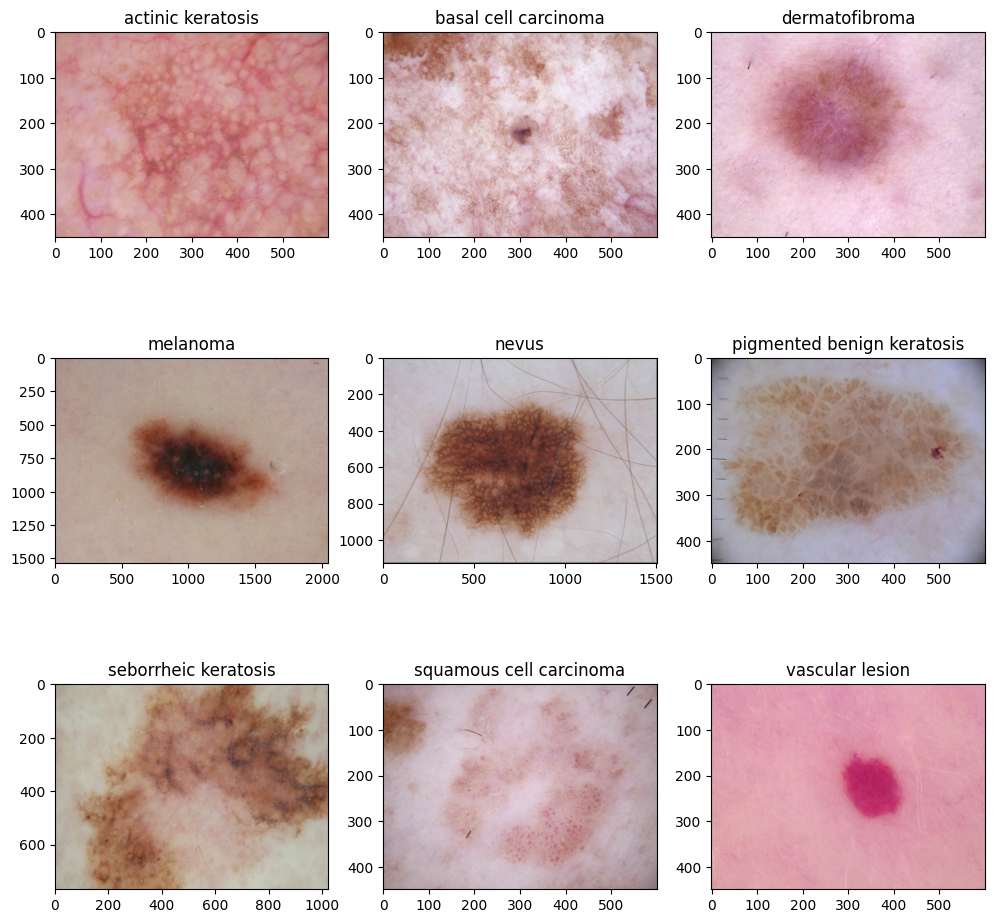

In [25]:
# your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(12,12))
for i in range(len(class_names)):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [29]:
# Your code goes here
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
    # Add other layers as needed
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [30]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 90, 90, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 45, 45, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 22, 22, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          69,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,761 (1.15 MB)

 Trainable params: 302,761 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [32]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.1660 - loss: 2.1080 - val_accuracy: 0.1973 - val_loss: 2.0365
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.2064 - loss: 2.0328 - val_accuracy: 0.1973 - val_loss: 2.0356
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.2501 - loss: 1.9777 - val_accuracy: 0.2439 - val_loss: 1.9609
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.2792 - loss: 1.9189 - val_accuracy: 0.2705 - val_loss: 1.8424
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.3241 - loss: 1.7945 - val_accuracy: 0.3415 - val_loss: 1.7595
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.3540 - loss: 1.7388 - val_accuracy: 0.3592 - val_loss: 1.6951
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.4154 - loss: 1.6031 - val_accuracy: 0.4102 - val_loss: 1.6188
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.4151 - loss: 1.5883 - val_accuracy: 0.3902 - va

### Visualizing training results

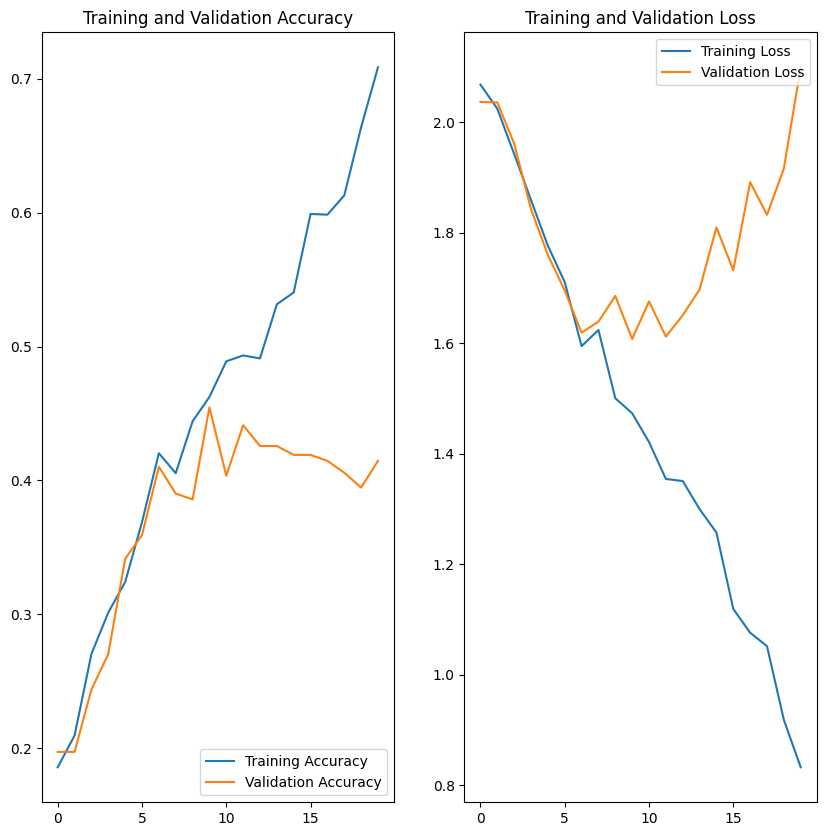

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the first base model**

- The above graphs clearly indicate that the model is suffering from overfitting because we can see the difference in loss functions in training & test around the 9th epoch

- The training accuracy is around 69% whereas for validation is only 41% for 20 epochs. Which clearly shows overfitting

- With these combinations of parameters definetly the model is overfitting

In [39]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# data_augument = keras.Sequential([
#                              layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
#                              layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
#                              layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
# ])

data_augument = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
    # Add other augmentation layers as needed
])

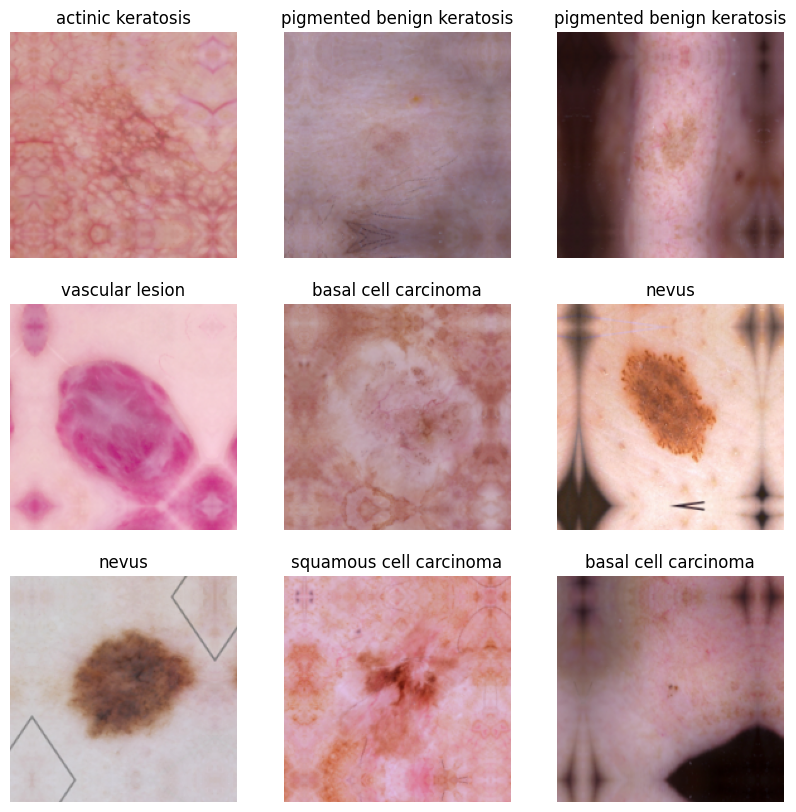

In [40]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [42]:
# You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = len(class_names)
# model = Sequential([ data_augument,
#                     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
# ])

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [43]:
# Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [44]:
# Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.1930 - loss: 2.1374 - val_accuracy: 0.2528 - val_loss: 2.0361
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.2138 - loss: 2.0257 - val_accuracy: 0.2350 - val_loss: 2.0436
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.2220 - loss: 2.0286 - val_accuracy: 0.1863 - val_loss: 2.0255
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.1995 - loss: 2.0048 - val_accuracy: 0.1707 - val_loss: 2.0253
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.2057 - loss: 2.0108 - val_accuracy: 0.2572 - val_loss: 1.9891
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.2308 - loss: 2.0004 - val_accuracy: 0.1863 - val_loss: 2.0364
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.2185 - loss: 2.1988 - val_accuracy: 0.2749 - val_loss: 1.9807
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.2335 - loss: 2.0774 - val_accura

### Visualizing the results

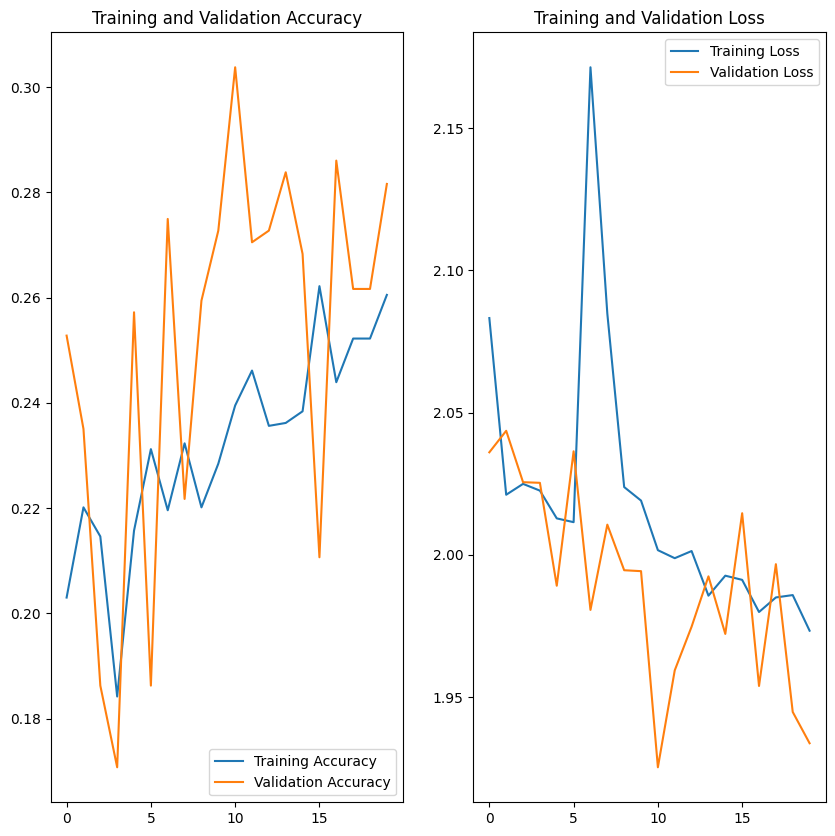

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**

- Due to data augmentation, we have succefully handled the overfitting problem whereas no improment in accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [46]:
# sanity check
path_lt=[]
lesion_lt=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_lt.append(str(j))
        lesion_lt.append(i)
df_dict_original = dict(zip(path_lt, lesion_lt))
original_df = pd.DataFrame(list(df_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
1,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
2,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
3,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
4,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
...,...,...
2254,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
2255,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
2256,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
2257,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion


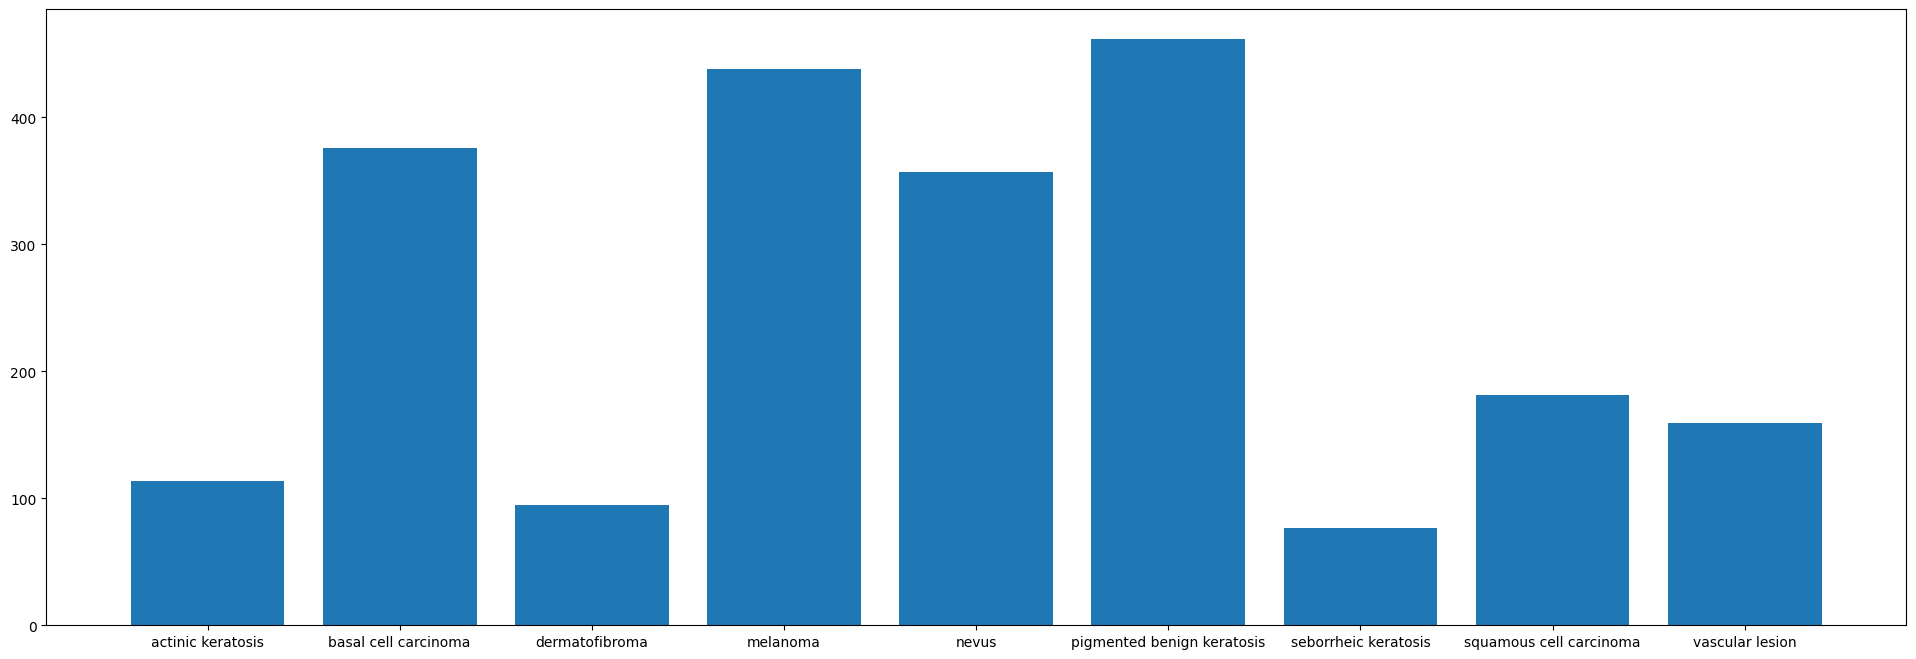

In [47]:
# To check least and dominant samples
counts=[]
for i in class_names:
    counts.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(24,8))
plt.bar(class_names,counts)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer 1 :- **Seborrheic keratosis** has least number of samples

Answer 2:- **Pigmented benign keratosis** be the dominating classes followed by **Melanoma**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [48]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [50]:
path_to_training_dataset="/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) # We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AB3E7725240>: 100%|██████████| 500/500 [00:39<00:00, 12.74 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3EC1B68F0>: 100%|██████████| 500/500 [00:37<00:00, 13.17 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3F82F6AD0>: 100%|██████████| 500/500 [00:44<00:00, 11.35 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7AB3EC45CE20>: 100%|██████████| 500/500 [00:38<00:00, 13.03 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3EC1B7100>: 100%|██████████| 500/500 [00:41<00:00, 12.15 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3EC51BE20>: 100%|██████████| 500/500 [00:44<00:00, 11.30 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3EC3BEEC0>: 100%|██████████| 500/500 [00:49<00:00, 10.01 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AB3EC580B50>: 100%|██████████| 500/500 [00:45<00:00, 10.88 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AB3EC201990>: 100%|██████████| 500/500 [00:34<00:00, 14.68 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [58]:
data_dir_train1 = pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [59]:
for i in class_names:
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_lt.append(str(j))
        lesion_lt.append(i)
df_dict_original = dict(zip(path_lt, lesion_lt))
new_df = pd.DataFrame(list(df_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
1,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
2,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
3,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
4,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
...,...,...
6754,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
6755,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
6756,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
6757,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [60]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,1391
melanoma,1357
basal cell carcinoma,1097
nevus,1085
squamous cell carcinoma,553
vascular lesion,472
actinic keratosis,330
dermatofibroma,268
seborrheic keratosis,206


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [61]:
batch_size = 32
img_height = 180
img_width = 180

In [71]:
data_dir_train1=pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1

PosixPath('/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

#### **Todo:** Create a training dataset

In [72]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print("Images in the Training dataset:",image_count_train1)

Images in the Training dataset: 4500


In [73]:
# Only for training
data_dir_train1=pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [74]:
# Only for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [75]:
# You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [76]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [77]:
epochs =30 #Train the model for ~30 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - accuracy: 0.1825 - loss: 2.1258 - val_accuracy: 0.2500 - val_loss: 1.9014
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 274ms/step - accuracy: 0.2595 - loss: 1.9371 - val_accuracy: 0.3422 - val_loss: 1.7471
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - accuracy: 0.3651 - loss: 1.7139 - val_accuracy: 0.4189 - val_loss: 1.6194
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.4559 - loss: 1.5399 - val_accuracy: 0.4889 - val_loss: 1.4759
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.4641 - loss: 1.5407 - val_accuracy: 0.4689 - val_loss: 1.4646
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 270ms/step - accuracy: 0.4927 - loss: 1.4063 - val_accuracy: 0.4422 - val_loss: 1.6144
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.4954 - loss: 1.4046 - val_accuracy: 0.5356 - val_loss: 1.3640
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.5391 - loss: 1

#### **Todo:**  Visualize the model results

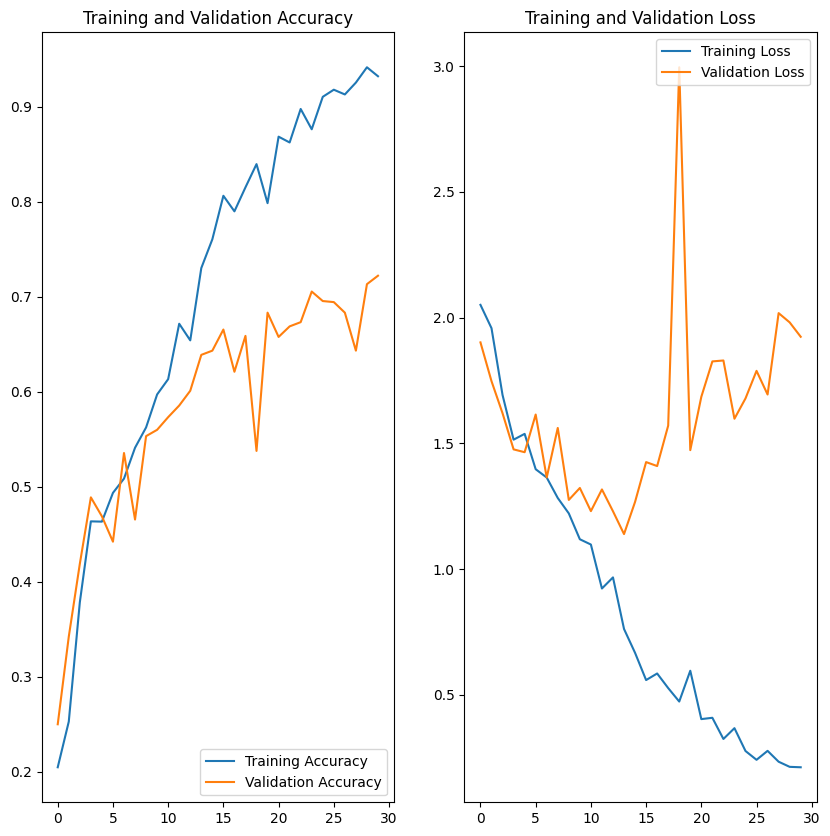

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- With the use of Augmentor library, accuracy got increased significantly

- Model is still seems to be overfitting

- The problem of overfitting can be solved by adding more number of layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter